In [1]:
import os
import time
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
train_data = pd.read_csv('titanic_train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

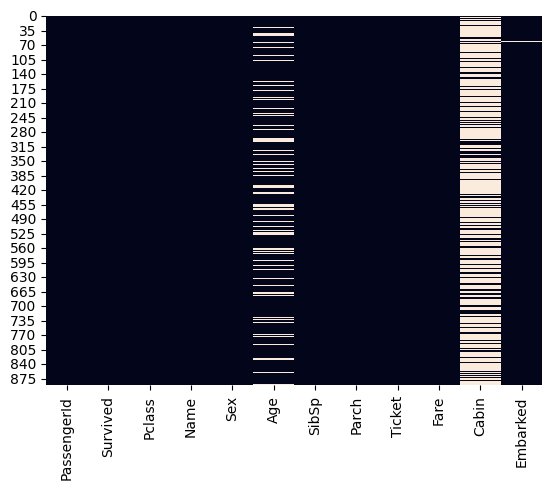

In [18]:
# Показать пробелы в данных
sns.heatmap(train_data.isnull(), cbar=False)

C:\Users\vasiliev\miniconda3\envs\garda\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


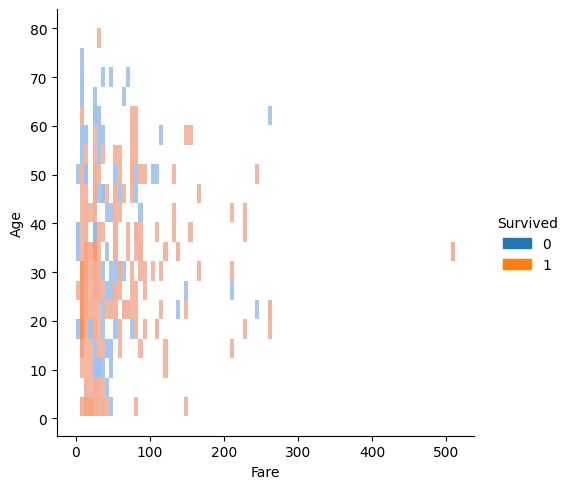

In [19]:
sns.displot(data=train_data, x='Fare', y='Age', hue="Survived")

<Axes: xlabel='Sex', ylabel='Age'>

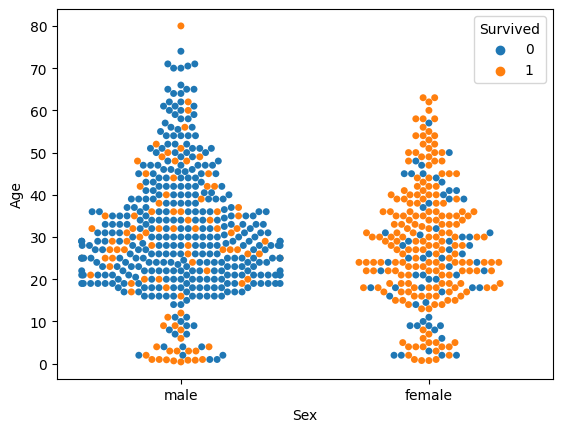

In [5]:
sns.swarmplot(data=train_data, x='Sex', y='Age', hue="Survived")

C:\Users\vasiliev\miniconda3\envs\garda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 56.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vasiliev\miniconda3\envs\garda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 28.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Sex', ylabel='Fare'>

C:\Users\vasiliev\miniconda3\envs\garda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 65.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vasiliev\miniconda3\envs\garda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 42.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


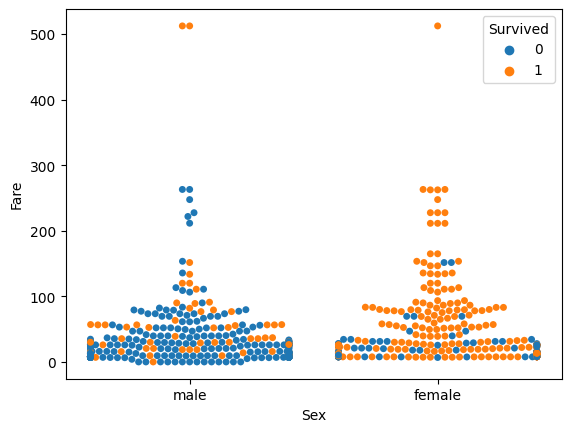

In [6]:
sns.swarmplot(data=train_data, x='Sex', y='Fare', hue="Survived")

C:\Users\vasiliev\miniconda3\envs\garda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 74.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vasiliev\miniconda3\envs\garda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 53.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Sex', ylabel='Pclass'>

C:\Users\vasiliev\miniconda3\envs\garda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 86.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vasiliev\miniconda3\envs\garda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


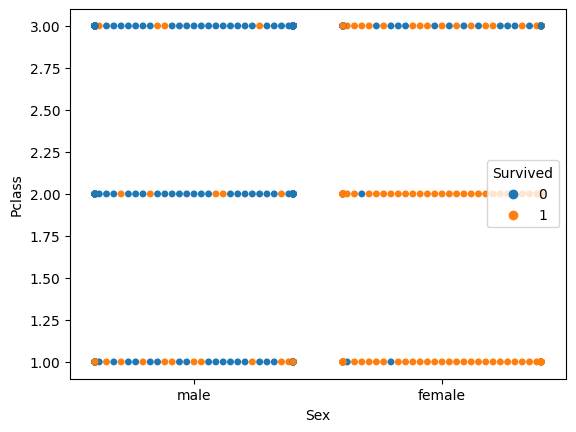

In [7]:
sns.swarmplot(data=train_data, x='Sex', y='Pclass', hue="Survived")

C:\Users\vasiliev\miniconda3\envs\garda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 76.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vasiliev\miniconda3\envs\garda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Sex', ylabel='SibSp'>

C:\Users\vasiliev\miniconda3\envs\garda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 83.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vasiliev\miniconda3\envs\garda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 72.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


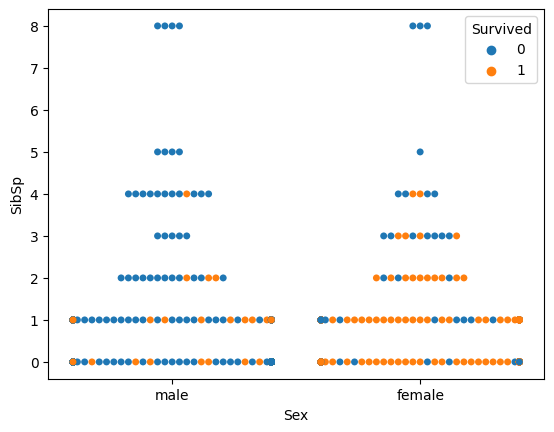

In [8]:
sns.swarmplot(data=train_data, x='Sex', y='SibSp', hue="Survived")

<Axes: xlabel='Sex', ylabel='Age'>

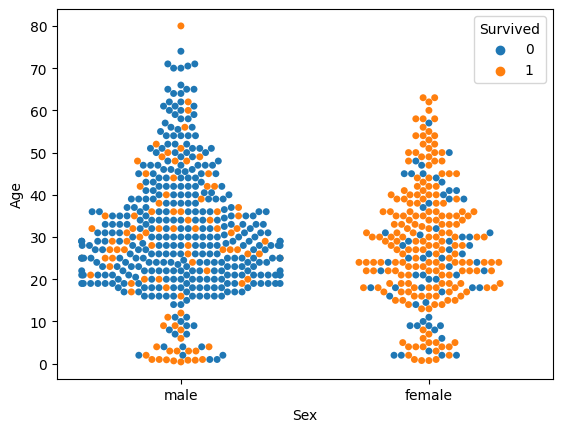

In [9]:
sns.swarmplot(data=train_data, x='Sex', y='Age', hue="Survived")

In [10]:
# not going to use these columns to train/test on
train_data.drop(['Name', 'PassengerId', 'Cabin', 'Ticket'], inplace=True, axis=1)

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

train_data["Embarked"] = label_encoder.fit_transform(train_data["Embarked"])
train_data["Sex"] = label_encoder.fit_transform(train_data["Sex"])

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


<Axes: >

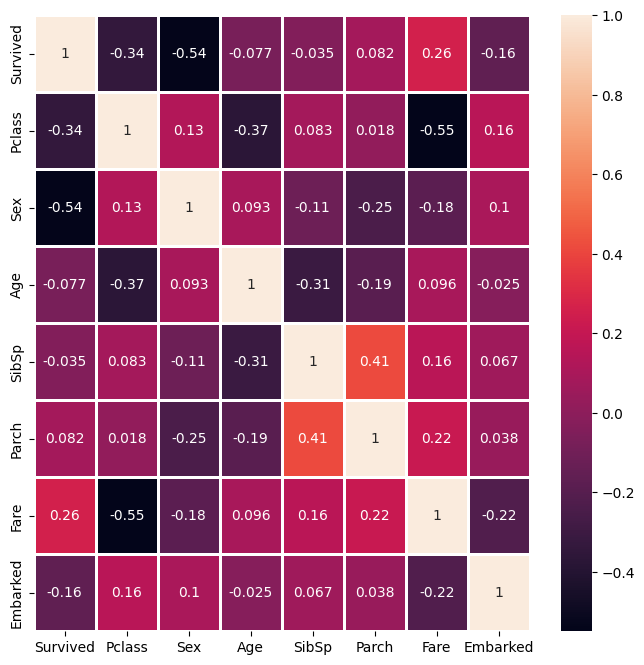

In [12]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(train_data.corr(), annot=True, linewidths=1, ax=ax)

In [13]:
target = train_data['Survived']
train_data.drop(['Survived'], inplace=True, axis=1)

X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.25, random_state=42, shuffle=False)
print(f'Sizes: X_train={X_train.shape}, y_train={y_train.shape}, X_test={X_test.shape}, y_test={y_test.shape}')

Sizes: X_train=(668, 7), y_train=(668,), X_test=(223, 7), y_test=(223,)


In [14]:
from xgboost import XGBClassifier

xgboost_model = XGBClassifier()
xgboost_model.fit(X_train, y_train)
y_preds_xgboost = xgboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_preds_xgboost)

print('Accuracy', accuracy)

Accuracy 0.8251121076233184


In [15]:
passenger = X_test[0:1]
print(passenger)
result = xgboost_model.predict(passenger)
print(result)

     Pclass  Sex   Age  SibSp  Parch  Fare  Embarked
668       3    1  43.0      0      0  8.05         2
[0]


### Что еще почитать

Копание в датасете титаника "ручками": https://habr.com/ru/articles/655955/

Сравнение различных фреймворков AutoML: https://www.kaggle.com/code/bouweceunen/automl-comparison-titanic-dataset/notebook